In [ ]:
import numpy as np
import random 
import matplotlib.pyplot as plt 
import math
import time

In [ ]:
a = 1 
b = 0.5 
c = 0.1
n = 10000
xmin, xmax = -1, 1
# 초기 파라미터

In [ ]:
def f(x, a, b, c):
  return a*x*x + b*x + c
  # return a*np.sin(b*x + c) 

In [ ]:
xs = np.random.uniform(xmin, xmax, n)
ys = f(xs, a, b, c) + np.random.normal(0, 0.5, n)

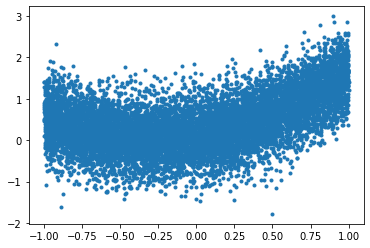

In [ ]:
plt.plot(xs, ys, '.')

In [ ]:
bestA, bestB, bestC = None, None, None 
bestLoss = 1e9

t0 = time.time()

lossesBySearch = []
for aa in np.arange(0, 2, 0.1):
  for bb in np.arange(0, 2, 0.1):
    for cc in np.arange(0, 1, 0.01):
      yys = f(xs, aa, bb, cc)
      loss = ((yys - ys) ** 2).mean()
      lossesBySearch.append(loss)
      if loss < bestLoss:
        bestA, bestB, bestC = aa, bb, cc
      bestLoss = loss 
tf = time.time()
print('Truth : ', a, b, c)
print('Fit results : ', bestA, bestB, bestC)
print('time : ', (tf - t0))

Truth :  1 0.5 0.1
Fit results :  1.9000000000000001 1.9000000000000001 0.0
time :  1.9548015594482422


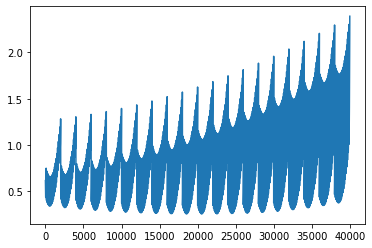

In [ ]:
plt.plot(lossesBySearch)

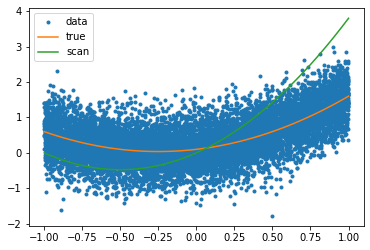

In [ ]:
plt.plot(xs, ys, '.', label = 'data')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, bestA, bestB, bestC)
yTrue = f(xxs, a, b, c)

plt.plot(xxs, yTrue, label = 'true')
plt.plot(xxs, yBest, label = 'scan')
plt.legend()

In [ ]:
def gradF(x, a, b, c):
  return (x*x, x, 1)

In [ ]:
# Gradient Descent Method

t0 = time.time()
fitA, fitB, fitC = 1.5, 1.5, 0
eta = 1e-4
lossesByGrad = []

for i in range(10000):
  yys = f(xs, fitA, fitB, fitC)
  gradA, gradB, gradC = gradF(xs, fitA, fitB, fitC)
  fitA = fitA - eta*((yys - ys)*gradA).mean()
  fitB = fitB - eta*((yys - ys)*gradB).mean()
  fitC = fitC - eta*((yys - ys)*gradC).mean()
  # 전부 계산했기 때문에 mean을 사용 

  loss = ((yys - ys)**2).sum()
  lossesByGrad.append(loss)


tf = time.time()
print('Truth : ', a, b, c)
print('Fit result : ', fitA, fitB, fitC)
print('Time : ', (tf- t0))

# 10만개의 x 데이터에 대해 f와 gradient를 전부 계산하는 것을 10만번 수행하며 파라미터 업데이트 

Truth :  1 0.5 0.1
Fit result :  1.442595471837092 1.2218879602088022 -0.03779031890241687
Time :  1.1613774299621582


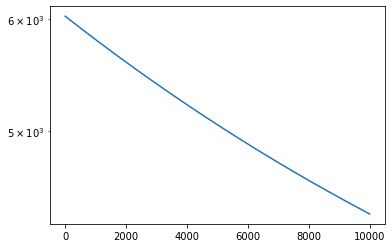

In [ ]:
plt.yscale('log')
plt.plot(lossesByGrad, '-')

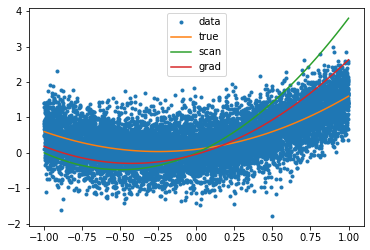

In [ ]:
plt.plot(xs, ys, '.', label = 'data')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, bestA, bestB, bestC)
yTrue = f(xxs, a, b, c)
yGrad = f(xxs, fitA, fitB, fitC)

plt.plot(xxs, yTrue, label = 'true')
plt.plot(xxs, yBest, label = 'scan')
plt.plot(xxs, yGrad, label = 'grad')
plt.legend()
# grad가 더 잘 찾는것을 확인할 수 있음 

### 1. 10만개의 x 데이터를 한번에 f와 gradient를 전부 계산하는 것을 10만번 수행하며 파라미터 업데이트함 컴퓨팅 비용 많이 소모 (Gradient Descent)
### 2. 또한 데이터를 한개씩 쪼개서 파라미터를 업데이트하면 더 빠르게 최적의 파라미터를 찾을 수 있지 않을까? 하는 아이디어도 존재 (Stochastic Descent)

In [ ]:
# 데이터 전체의 gradient를 한번에 계산하여 도출하는 것을 Gradient Descent
# 데이터를 한개씩 gradent를 계산하여 도출하는 것을 Stochastic Descent

In [ ]:
# Stochastic Descent 

t0 = time.time()
SGD_A, SGD_B, SGD_C = 1.5, 1.5, 0
eta = 1e-7
lossesBySGD = []

for i in range(1000):
  for x,y in zip(xs, ys):
    yys = f(x, SGD_A, SGD_B, SGD_C)
    gradA, gradB, gradC = gradF(x, SGD_A, SGD_B, SGD_C)
    SGD_A = SGD_A - eta*((yys - y)*gradA)
    SGD_B = SGD_B - eta*((yys - y)*gradB)
    SGD_C = SGD_C - eta*((yys - y)*gradC)
    # 하나씩 계산하기 때문에 mean필요없음 
  
  yys = f(xs, SGD_A, SGD_B, SGD_C)
  loss = ((yys - ys)**2).sum()
  lossesBySGD.append(loss)


tf = time.time()
print('Truth : ', a, b, c)
print('Fit result : ', SGD_A, SGD_B, SGD_C)
print('Time : ', (tf- t0))

# 전체 데이터를 한개씩 예측한 값과 실제값의 차이 비교를 통해 해당 파라미터들을 조정

Truth :  1 0.5 0.1
Fit result :  1.4425962020391074 1.2218917420726987 -0.03778895087380024
Time :  32.61179971694946


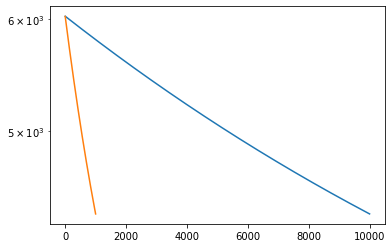

In [ ]:
plt.yscale('log')
plt.plot(lossesByGrad, '-')
plt.plot(lossesBySGD, '-')
# loss가 떨어지는 속도가 다른 것을 확인할 수 있다.
# 즉 데이터 포인트 하나씩 보면서 업데이트 하는 것이 더 빠르다는 것을 알 수 있다.
# 실제 gradient descent보다 SGD가 더 컴퓨팅 비용도 줄어드는 것을 알 수 있다. 

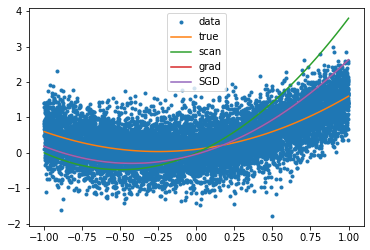

In [ ]:
plt.plot(xs, ys, '.', label = 'data')
xxs = np.linspace(xmin, xmax, 100)
yBest = f(xxs, bestA, bestB, bestC)
yTrue = f(xxs, a, b, c)
yGrad = f(xxs, fitA, fitB, fitC)
ySGD = f(xxs, SGD_A, SGD_B, SGD_C)

plt.plot(xxs, yTrue, label = 'true')
plt.plot(xxs, yBest, label = 'scan')
plt.plot(xxs, yGrad, label = 'grad')
plt.plot(xxs, ySGD, label = 'SGD')
plt.legend()
# grad가 더 잘 찾는것을 확인할 수 있음 

### 1. 데이터를 1000개씩 묶어서 계산해서 파라미터를 수정하면 SGD보다도 컴퓨팅 비용이 더 적게 들면서 효율적일 수 있다.


In [ ]:
# 데이터를 하나씩 계산하는 것보다 묶어서 계산 
# SGD Batch


t0 = time.time()
BAT_A, BAT_B, BAT_C = 1.5, 1.5, 0
eta = 1e-7
lossesByBAT = []
losses1ByBAT =[]
batchsize = 100

for i in range(10000):
  for j in range(batchsize, len(xs), batchsize):
    yys = f(xs[j-batchsize : j], BAT_A, BAT_B, BAT_C)
    df = yys - ys[j-batchsize : j]
    gradA, gradB, gradC = gradF(xs[j-batchsize : j], BAT_A, BAT_B, BAT_C)
    BAT_A = BAT_A - eta*(df*gradA).mean()
    BAT_B = BAT_B - eta*(df*gradB).mean()
    BAT_C = BAT_C - eta*(df*gradC).mean()
    loss = (df ** 2).mean()
    losses1ByBAT.append(loss)
    # 하나씩 계산하기 때문에 mean필요없음 
  
  yys = f(xs, BAT_A, BAT_B, BAT_C)
  loss = ((yys - ys)**2).mean()
  lossesByBAT.append(loss)


tf = time.time()
print('Truth : ', a, b, c)
print('Fit result : ', BAT_A, BAT_B, BAT_C)
print('Time : ', (tf- t0))

# 전체 데이터를 한개씩 예측한 값과 실제값의 차이 비교를 통해 해당 파라미터들을 조정

Truth :  1 0.5 0.1
Fit result :  1.493103263915369 1.468141220183839 -0.006581155700887525
Time :  39.644423484802246


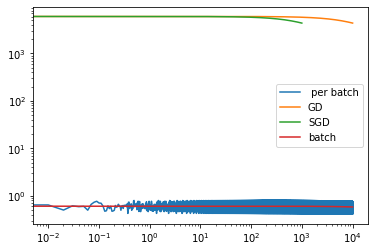

In [ ]:
plt.yscale('log')
plt.xscale('log')
x1ByBatch = np.linspace(1, len(lossesByBAT), len(losses1ByBAT)) -1
plt.plot(x1ByBatch, losses1ByBAT, '-', label = ' per batch')
plt.plot(lossesByGrad, '-', label = 'GD')
plt.plot(lossesBySGD, '-', label = 'SGD')
plt.plot(lossesByBAT, '-', label = 'batch')
plt.legend()
# loss가 떨어지는 속도가 다른 것을 확인할 수 있다.
# 즉 데이터 포인트 하나씩 보면서 업데이트 하는 것이 더 빠르다는 것을 알 수 있다.
# 실제 gradient descent보다 SGD가 더 컴퓨팅 비용도 줄어드는 것을 알 수 있다. 
# Batch는 SGD보다도 더 빠르게 Global Minimum을 찾는것을 볼 수 있다. 

In [ ]:
min(lossesByBAT)

0.5805819274591676